<a href="https://colab.research.google.com/github/carsonasmith17/labs/blob/main/Craigslist_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/moa#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

In [65]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

In [66]:
print(listings)

[<li class="cl-static-search-result" title="&gt; NOKIA - Comes w/ all accessories needed incl. extra battery &lt;">
<a href="https://charlottesville.craigslist.org/mob/d/charlottesville-nokia-comes-all/7788090327.html">
<div class="title">&gt; NOKIA - Comes w/ all accessories needed incl. extra battery &lt;</div>
<div class="details">
<div class="price">$0</div>
</div>
</a>
</li>, <li class="cl-static-search-result" title="Samsung Galaxy A11 - T-Mobile">
<a href="https://charlottesville.craigslist.org/mob/d/charlottesville-samsung-galaxy-a11/7783598361.html">
<div class="title">Samsung Galaxy A11 - T-Mobile</div>
<div class="details">
<div class="price">$75</div>
<div class="location">
                        Charlottesville
                    </div>
</div>
</a>
</li>, <li class="cl-static-search-result" title="iPhone 15 Pro max 512GB unlocked with SIM slot AppleCare+ included!">
<a href="https://charlottesville.craigslist.org/mob/d/charlottesville-iphone-15-pro-max-512gb/7777373194.h

In [112]:
import re

brands = ['apple', 'samsung','nokia','google','motorola']

data = []
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    location = listings[k].find('div',class_='location')

    words = title.split()
    hits = [word for word in words if word in brands]
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]

    regex_search = re.search(r'20[0-9][0-9]|19[0-9][0-9]', title )
    if regex_search is None:
        year = np.nan
    else:
        year = regex_search.group(0)

    data.append({'title':title,'price':price,'year':year,'link':link,'brand':brand,'location':location})

In [118]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
df['location'] = df['location']
print(df.shape)
df.drop_duplicates()
df.to_csv('craigslist_cville_CellPhones.csv')
df.head(10)

(7, 7)


,title,price,year,link,brand,location,age
0,> nokia - comes w/ all accessories needed incl...,0,NaN,https://charlottesville.craigslist.org/mob/d/c...,nokia,None,NaN
1,samsung galaxy a11 - t-mobile,75,NaN,https://charlottesville.craigslist.org/mob/d/c...,samsung,[\n Charlottesville\n ...,NaN
2,iphone 15 pro max 512gb unlocked with sim slot...,1200,NaN,https://charlottesville.craigslist.org/mob/d/c...,missing,[\n Near Wegmans\n ...,NaN
3,series 9 apple watch,308,NaN,https://charlottesville.craigslist.org/mob/d/o...,apple,[\n Orange\n ...,NaN
4,samsung galaxy z fold 3 (silver) - gently used,600,NaN,https://charlottesville.craigslist.org/mob/d/c...,samsung,"[\n Charlottesville, VA...",NaN
5,iphone 15 pro max 512gb unlocked with sim slot...,1200,NaN,https://charlottesville.craigslist.org/mob/d/c...,missing,[\n Near Wegmans\n ...,NaN
6,esr halolock magnetic wireless car charger,10,NaN,https://charlottesville.craigslist.org/mob/d/f...,missing,None,NaN


count       7.000000
mean      484.714286
std       531.656755
min         0.000000
25%        42.500000
50%       308.000000
75%       900.000000
max      1200.000000
Name: price, dtype: float64


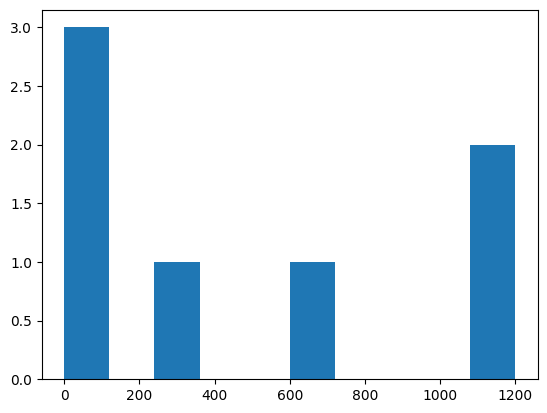

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64


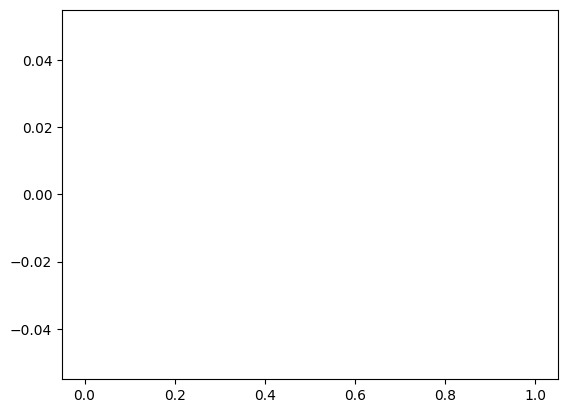

In [119]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

count       7.000000
mean      484.714286
std       531.656755
min         0.000000
25%        42.500000
50%       308.000000
75%       900.000000
max      1200.000000
Name: price, dtype: float64


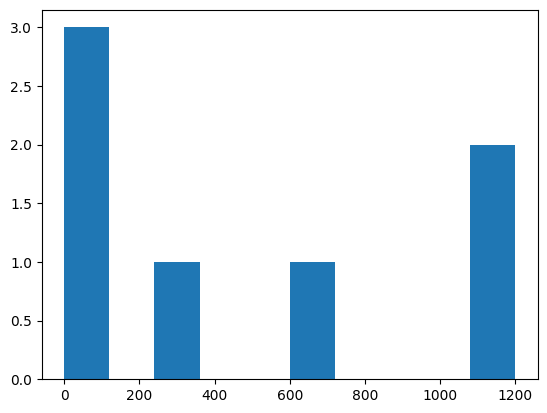

count           7
unique          4
top       missing
freq            3
Name: brand, dtype: object


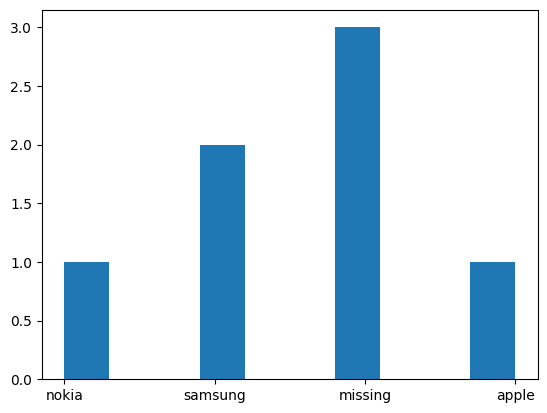

In [120]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['brand'].describe())
df['brand'].hist(grid=False)
plt.show()

In [121]:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                               
        count        mean        std    min     25%     50%      75%     max
brand                                                                       
apple     1.0  308.000000        NaN  308.0  308.00   308.0   308.00   308.0
missing   3.0  803.333333  687.04682   10.0  605.00  1200.0  1200.00  1200.0
nokia     1.0    0.000000        NaN    0.0    0.00     0.0     0.00     0.0
samsung   2.0  337.500000  371.23106   75.0  206.25   337.5   468.75   600.0

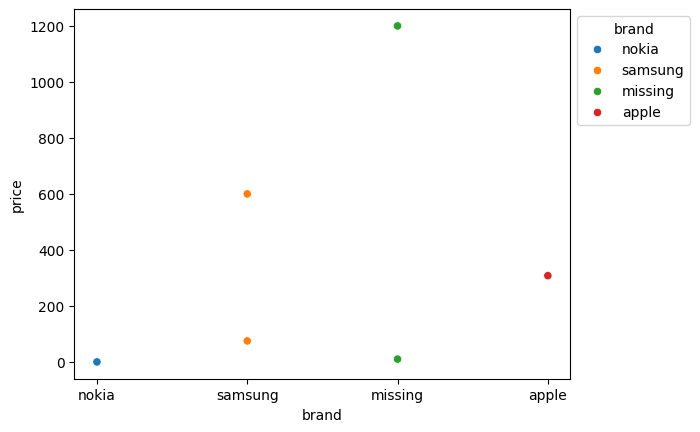

In [122]:
ax = sns.scatterplot(data=df, x='brand', y='price', hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [123]:
df.loc[:,['location','brand']].groupby('brand').describe()

location                                                            \
           count unique                                                top   
brand                                                                        
apple          1      1  [\n                        Orange\n           ...   
missing        2      1  [\n                        Near Wegmans\n     ...   
nokia          0      0                                                NaN   
samsung        2      2  [\n                        Charlottesville\n  ...   

              
        freq  
brand         
apple      1  
missing    2  
nokia    NaN  
samsung    1

count       7.000000
mean      484.714286
std       531.656755
min         0.000000
25%        42.500000
50%       308.000000
75%       900.000000
max      1200.000000
Name: price, dtype: float64


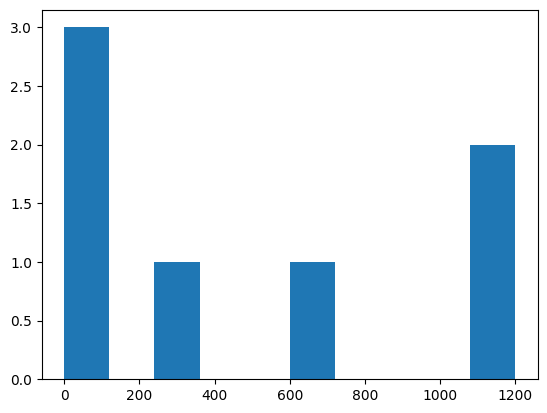

count                                                     5
unique                                                    4
top       [\n                        Near Wegmans\n     ...
freq                                                      2
Name: location, dtype: object


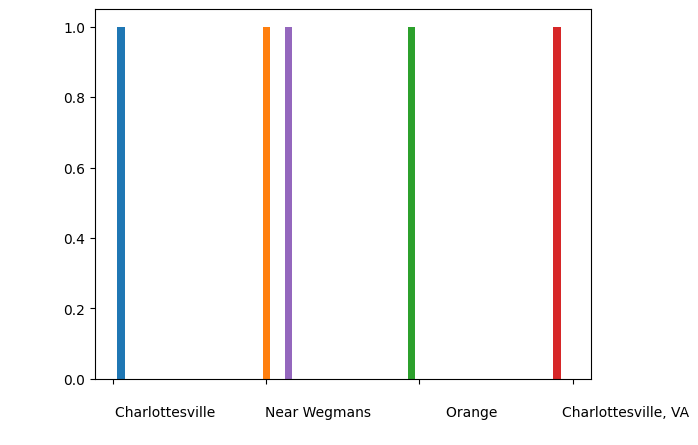

In [126]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['location'].describe())
df['location'].hist(grid=False)
plt.show()

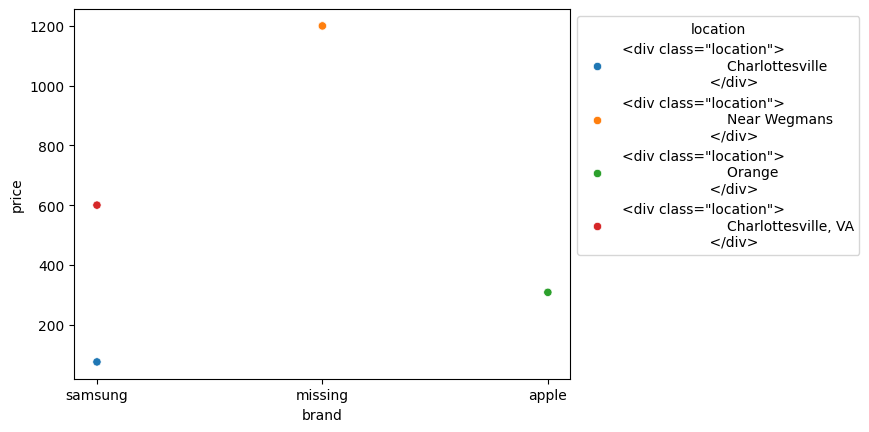

In [133]:
ax = sns.scatterplot(data=df, x='brand', y='price', hue='location')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))